In [19]:
# 因子分析とは
# 複数の変数の変動メカニズムを少数の共通要因によって縮約するための分析手法
# 共通要因は「共通因子」ともいう

In [20]:
# ワインデータで実践
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from factor_analyzer import FactorAnalyzer

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X .head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
# データを標準化する
X_stats = X.describe().transpose()

def norm(x):
    return (x-X_stats['mean'])/X_stats['std']

X = norm(X)
X .head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [22]:
# 1因子モデルで実行
fa = FactorAnalyzer(n_factors=1, rotation=None)
fa.fit(X)

# 因子負荷量：得られた共通因子が分析に用いた変数に与える影響の強さを表す値
loadings_df = pd.DataFrame(data=fa.loadings_.transpose(), columns=X.columns)
loadings_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.262437,0.466352,-0.002497,0.447748,-0.256794,-0.854556,-0.951913,0.585547,-0.629636,0.168437,-0.583914,-0.798047,-0.553551


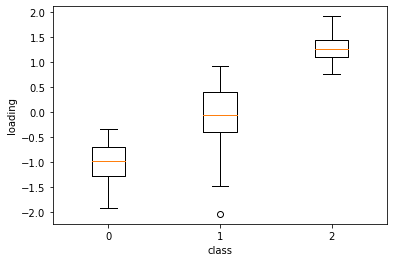

In [23]:
# クラスごとに箱ひげ図で因子負荷量を表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1'])
result_df['class'] = wine.target

class0_df = result_df.loc[result_df['class']==0]["factor1"].tolist()
class1_df = result_df.loc[result_df['class']==1]["factor1"].tolist()
class2_df = result_df.loc[result_df['class']==2]["factor1"].tolist()

fig, ax = plt.subplots()
ax.boxplot([class0_df, class1_df, class2_df], labels=['0', '1', '2'])
ax.set_xlabel('class')
ax.set_ylabel('loading')
plt.show()

In [24]:
# 多因子モデルで実行
fa = FactorAnalyzer(n_factors=3, rotation=None) # 因子数3つ
fa.fit(X)

# 因子負荷量
loadings_df = pd.DataFrame(data=fa.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_df

# factor1: フェノール関係の特徴量? Ex, total_phenols, flavanoids, od280/od315_of_diluted_wines
# factor2: アルコール度数と色の強さ? Ex, alcohol, color_intensity
# factor3: 灰 (?) に関する特徴量? Ex, ash, alcalinity_of_ash

,factor1,factor2,factor3
alcohol,0.303696,0.718459,-0.184135
malic_acid,-0.469445,0.278685,0.086192
ash,-0.000897,0.449071,0.651790
alcalinity_of_ash,-0.510072,-0.028359,0.699151
magnesium,0.263600,0.349077,0.091006
total_phenols,0.845208,0.094727,0.166563
flavanoids,0.938545,-0.012179,0.190408
nonflavanoid_phenols,-0.580890,0.044361,0.138686
proanthocyanins,0.618387,0.042691,0.122036
color_intensity,-0.185668,0.809678,-0.108117


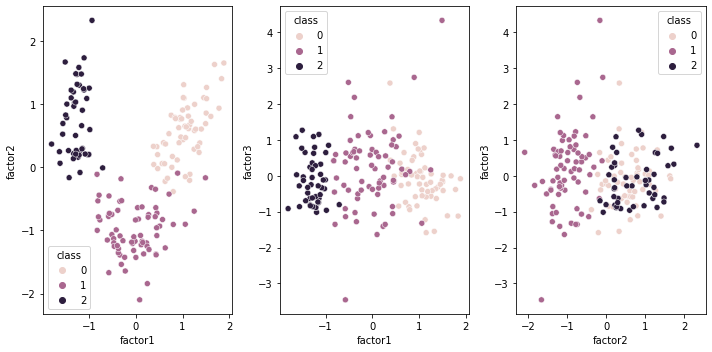

In [25]:
# 散布図で因子負荷量を表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2', 'factor3'])
result_df['class'] = wine.target

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10.0, 5.0), nrows=1, ncols=3)
sns.scatterplot(x='factor1', y='factor2', hue='class', data=result_df, ax=ax1)
sns.scatterplot(x='factor1', y='factor3', hue='class', data=result_df, ax=ax2)
sns.scatterplot(x='factor2', y='factor3', hue='class', data=result_df, ax=ax3)
plt.tight_layout()

In [26]:
# 共通性
# 各変数の持つ情報が因子モデルにどれだけ反映されているかを示す
# 共通性の小さい変数は因子モデルから削除して再度因子分析を行うとより良い結果を得ることができる
communalities_df = pd.DataFrame(data=fa.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_df

,communalities
alcohol,0.642321
malic_acid,0.305473
ash,0.626495
alcalinity_of_ash,0.749790
magnesium,0.199621
total_phenols,0.751092
flavanoids,0.917270
nonflavanoid_phenols,0.358634
proanthocyanins,0.399117
color_intensity,0.701741


In [27]:
# 回転
# 因子の解釈を容易にするような座標軸を探索する手続き

# 直交回転：各座標軸が互いに直交したままの回転。リマックス回転が有名
# 各因子スコアが独立と仮定できる場合に使用する。
fa_varimax = FactorAnalyzer(n_factors=3, rotation="varimax") # 因子数3つ
fa_varimax.fit(X)

loadings_varimax_df = pd.DataFrame(data=fa_varimax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_varimax_df

,factor1,factor2,factor3
alcohol,0.035312,0.797974,-0.065666
malic_acid,-0.494937,0.093006,0.227728
ash,0.025898,0.312247,0.726860
alcalinity_of_ash,-0.300980,-0.305777,0.752131
magnesium,0.167642,0.396137,0.120802
total_phenols,0.798142,0.336009,0.034061
flavanoids,0.920812,0.262887,0.016319
nonflavanoid_phenols,-0.519761,-0.170054,0.244057
proanthocyanins,0.591530,0.221014,0.019025
color_intensity,-0.427445,0.711506,0.113094


In [28]:
# 斜交回転：直行回転以外の回転。プロマックス回転が有名
fa_promax = FactorAnalyzer(n_factors=3, rotation="promax") # 因子数3つ
fa_promax.fit(X)

loadings_promax_df = pd.DataFrame(data=fa_promax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_promax_df

,factor1,factor2,factor3
alcohol,-0.084919,0.828240,-0.123595
malic_acid,-0.491256,0.134425,0.164368
ash,0.122195,0.220916,0.743625
alcalinity_of_ash,-0.132584,-0.375304,0.771409
magnesium,0.145143,0.369529,0.120326
total_phenols,0.801492,0.231137,0.120158
flavanoids,0.937470,0.140878,0.123795
nonflavanoid_phenols,-0.478164,-0.136055,0.197719
proanthocyanins,0.596685,0.143204,0.084610
color_intensity,-0.526873,0.779382,0.007136


In [29]:
# 構造方程式とは
# 構造方程式モデリング（Structural Equation Modeling, SEM）のことで、共分散構造分析とも呼ばれる
# 仮説として設定した多数の変数間の関係を、有向グラフにモデリングして行う分析のこと

import semopy as sem
from semopy import Model
from semopy.examples import political_democracy

# smnopyで用意されているデータセットを使用
data = political_democracy.get_data()

# 仮説モデルを取得
desc = political_democracy.get_model()
print(desc)

# 学習を実行数r
mod = Model(desc)
res = mod.fit(data)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [30]:
# 学習結果のパラメータ一覧を表示する
inspect = mod.inspect()
print(inspect)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [31]:
# 適合度を表示する
stats = sem.calc_stats(mod)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


In [32]:
# グラフィカルモデルとは
# 変数間の条件付き独立の関係を無向グラフで表現したモデル
# 確率変数間の条件付き依存構造を示す